# Waiting Times at DMV Field Offices


## Load the Libraries

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib.cbook import boxplot_stats 
import matplotlib.pyplot as plt

## Load the data

In [2]:
dmv_df = pd.read_csv("../data/dmv_data_output_12_14_2020.csv", index_col=0)

In [3]:
dmv_df.head()

,street,locality,region,zip,SU0,SU1,SU2,SU3,SU4,SU5,...,SA23,title transfers,licensing services,replace lost/stolen/damaged,plates permits & placards,testing,records,registration,request miscellaneous original documents,other
name,,,,,,,,,,,,,,,,,,,,,
Alturas,903 W C St,Alturas,CA,96101,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,1.0,1.0,1,1.0,1,NaN
Arleta,14400 Van Nuys Blvd,Arleta,CA,91331,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,1.0,1.0,1,1.0,1,NaN
Arvin,317 Campus Dr,Arvin,CA,93203,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,1.0,1.0,1,1.0,1,NaN
Auburn,11722 Enterprise Dr,Auburn,CA,95603,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,1.0,1.0,1,1.0,1,NaN
Bakersfield Southwest,7000 Schirra Ct,Bakersfield,CA,93313,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,1.0,1.0,1,1.0,1,NaN


## Clean the Data

Get rid of columns with 100 NAs (no dmv is open on sunday and none are open late at night or early in the morning).

In [4]:
cols_with_data = dmv_df.columns[dmv_df.isnull().sum() != 175]

# # all columns where every sample is NA
dmv_df = dmv_df[cols_with_data]
dmv_df.columns

Index([' street', ' locality', ' region', ' zip', 'M7', 'M8', 'M9', 'M10',
       'M11', 'M12', 'M13', 'M14', 'M15', 'M16', 'M17', 'M18', 'TU7', 'TU8',
       'TU9', 'TU10', 'TU11', 'TU12', 'TU13', 'TU14', 'TU15', 'TU16', 'TU17',
       'TU18', 'W7', 'W8', 'W9', 'W10', 'W11', 'W12', 'W13', 'W14', 'W15',
       'W16', 'W17', 'W18', 'TH7', 'TH8', 'TH9', 'TH10', 'TH11', 'TH12',
       'TH13', 'TH14', 'TH15', 'TH16', 'TH17', 'TH18', 'F7', 'F8', 'F9', 'F10',
       'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'SA7', 'SA8',
       'SA9', 'SA10', 'SA11', 'SA12', 'SA13', 'SA14', 'SA15', 'SA16', 'SA17',
       'SA18', ' title transfers', ' licensing services',
       ' replace lost/stolen/damaged', 'plates permits & placards', ' testing',
       ' records', ' registration',
       ' request miscellaneous original documents'],
      dtype='object')

## Calculate Descriptive Statistics

#### Define Helper Cols

In [5]:
# define columns
# 168 wait time columns
wait_time_cols = ['M7', 'M8', 'M9', 'M10', 'M11', 'M12','M13', 'M14', 'M15', 'M16', 'M17', 'M18',
'TU7', 'TU8', 'TU9', 'TU10', 'TU11', 'TU12', 'TU13', 'TU14', 'TU15', 'TU16', 'TU17', 'TU18',
'W7', 'W8', 'W9', 'W10', 'W11', 'W12', 'W13', 'W14', 'W15', 'W16', 'W17', 'W18',
'TH7', 'TH8', 'TH9', 'TH10', 'TH11', 'TH12', 'TH13','TH14', 'TH15', 'TH16', 'TH17', 'TH18',
'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18',
'SA7', 'SA8', 'SA9', 'SA10', 'SA11', 'SA12','SA13', 'SA14', 'SA15', 'SA16', 'SA17', 'SA18']

# 120 weekday cols
weekday_cols = ['M7', 'M8', 'M9', 'M10', 'M11', 'M12','M13', 'M14', 'M15', 'M16', 'M17', 'M18',
'TU7', 'TU8', 'TU9', 'TU10', 'TU11', 'TU12', 'TU13', 'TU14', 'TU15', 'TU16', 'TU17', 'TU18',
'W7', 'W8', 'W9', 'W10', 'W11', 'W12', 'W13', 'W14', 'W15', 'W16', 'W17', 'W18',
'TH7', 'TH8', 'TH9', 'TH10', 'TH11', 'TH12', 'TH13','TH14', 'TH15', 'TH16', 'TH17', 'TH18',
'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18',]


mon_cols = ['M7', 'M8', 'M9', 'M10', 'M11', 'M12','M13', 'M14', 'M15', 'M16', 'M17', 'M18',]
tues_cols = ['TU7', 'TU8', 'TU9', 'TU10', 'TU11', 'TU12', 'TU13', 'TU14', 'TU15', 'TU16', 'TU17', 'TU18',]
wed_cols = ['W7', 'W8', 'W9', 'W10', 'W11', 'W12', 'W13', 'W14', 'W15', 'W16', 'W17', 'W18',]
thurs_cols = ['TH7', 'TH8', 'TH9', 'TH10', 'TH11', 'TH12', 'TH13','TH14', 'TH15', 'TH16', 'TH17', 'TH18',]
fri_cols = ['F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18',]
sat_cols = ['SA7', 'SA8', 'SA9', 'SA10', 'SA11', 'SA12','SA13', 'SA14', 'SA15', 'SA16', 'SA17', 'SA18']

# hour cols dictionary hour_cols[hour] = [cols]
hour_cols = {}
for i in range(7,19):
    hour_cols[i] = ['M'+ str(i),'TU'+ str(i), 'W'+ str(i), 'TH'+ str(i), 'F'+ str(i), "SA"+ str(i)]
    
# weekday_hour cols dict
weekday_hour_cols_dict = {}
for i in range(7,19):
    weekday_hour_cols_dict[i] = ['M'+ str(i),'TU'+ str(i), 'W'+ str(i), 'TH'+ str(i), 'F'+ str(i)]

### 25th, 50th, and 75th percentiles of hourly wait times by location

In [6]:
# Get Descriptive Stats for Each Location
# Note: could get min and max as well, but thought that might be overkill in terms of no. of columns

wait_time_df = dmv_df[wait_time_cols]

# overall descriptive statistics per location (25th, 75th, and std)
desc_wait_time = wait_time_df.apply(pd.DataFrame.describe, percentiles = [.25, .50, .75], axis=1)[["std", "25%", "50%", "75%"]]
desc_wait_time.rename(columns={"std": "wait_std", "25%": "wait_25", "50%": "wait_50", "75%": "wait_75"}, inplace = True)

wait_time_df = pd.concat([wait_time_df, desc_wait_time], axis = 1, join = "inner")

# weekday distribution
desc_wkday_wait_time = wait_time_df[weekday_cols].apply(pd.DataFrame.describe, percentiles = [.25, .50, .75], axis=1)[["std", "25%", "50%", "75%"]]
desc_wkday_wait_time.rename(columns={"std": "wkday_wait_std", "25%": "wkday_wait_25", "50%": "wkday_wait_50", "75%": "wkday_wait_75"}, inplace = True)

wait_time_df = pd.concat([wait_time_df, desc_wkday_wait_time], axis = 1, join = "inner")

wait_time_df.head()


,M7,M8,M9,M10,M11,M12,M13,M14,M15,M16,...,SA17,SA18,wait_std,wait_25,wait_50,wait_75,wkday_wait_std,wkday_wait_25,wkday_wait_50,wkday_wait_75
name,,,,,,,,,,,,,,,,,,,,,
Alturas,0.0,1.0,2.0,1.0,2.0,0.0,2.0,1.0,1.0,0.0,...,0.0,0.0,0.774698,0.0,0.0,1.00,0.789049,0.00,1.0,1.00
Arleta,0.0,12.0,21.0,33.0,31.0,34.0,32.0,31.0,43.0,28.0,...,0.0,0.0,14.939255,0.0,14.5,31.00,14.205305,7.00,20.0,31.00
Arvin,0.0,14.0,36.0,38.0,38.0,33.0,36.0,36.0,25.0,7.0,...,0.0,0.0,12.776450,0.0,10.0,24.00,12.510098,4.00,13.5,25.25
Auburn,0.0,12.0,28.0,33.0,36.0,33.0,30.0,20.0,16.0,5.0,...,0.0,0.0,12.355075,0.0,11.5,20.00,12.106589,1.50,15.5,21.00
Bakersfield Southwest,0.0,15.0,42.0,45.0,33.0,33.0,32.0,31.0,38.0,17.0,...,0.0,0.0,15.134349,0.0,15.0,29.25,14.658678,3.75,17.5,30.25


#### Median Wait Times By Day by Location

In [7]:
# how long is the average wait on a given day by location?
wait_time_df["mon_median"]   = wait_time_df[mon_cols].median(axis=1)
wait_time_df["tue_median"]  = wait_time_df[tues_cols].median(axis=1)
wait_time_df["wed_median"]   = wait_time_df[wed_cols].median(axis=1)
wait_time_df["thu_median"] = wait_time_df[thurs_cols].median(axis=1)
wait_time_df["fri_median"]   = wait_time_df[fri_cols].median(axis=1)
wait_time_df["sat_median"]   = wait_time_df[sat_cols].median(axis=1)

#### Median Wait Times by Hour by Location

In [8]:
# how long is the average wait on a given hour by location? 
# new column = wait_time_df[0_hour_avg_wait] = avg of waits across 0th hour

# NOTE: Just focused on weekdays for now given there is little to no wait on weekends. Can easily add those day if you'd like.

for i in range(7,19):
    weekday_hour_col_name = str(i) +"_wkday_hour_median_wait"
    weekday_hour_cols = weekday_hour_cols_dict[i]
    print(weekday_hour_col_name)
    print(weekday_hour_cols)
    wait_time_df[weekday_hour_col_name] = wait_time_df[weekday_hour_cols].median(axis=1)
    
wait_time_df.head()

7_wkday_hour_median_wait
['M7', 'TU7', 'W7', 'TH7', 'F7']
8_wkday_hour_median_wait
['M8', 'TU8', 'W8', 'TH8', 'F8']
9_wkday_hour_median_wait
['M9', 'TU9', 'W9', 'TH9', 'F9']
10_wkday_hour_median_wait
['M10', 'TU10', 'W10', 'TH10', 'F10']
11_wkday_hour_median_wait
['M11', 'TU11', 'W11', 'TH11', 'F11']
12_wkday_hour_median_wait
['M12', 'TU12', 'W12', 'TH12', 'F12']
13_wkday_hour_median_wait
['M13', 'TU13', 'W13', 'TH13', 'F13']
14_wkday_hour_median_wait
['M14', 'TU14', 'W14', 'TH14', 'F14']
15_wkday_hour_median_wait
['M15', 'TU15', 'W15', 'TH15', 'F15']
16_wkday_hour_median_wait
['M16', 'TU16', 'W16', 'TH16', 'F16']
17_wkday_hour_median_wait
['M17', 'TU17', 'W17', 'TH17', 'F17']
18_wkday_hour_median_wait
['M18', 'TU18', 'W18', 'TH18', 'F18']


,M7,M8,M9,M10,M11,M12,M13,M14,M15,M16,...,9_wkday_hour_median_wait,10_wkday_hour_median_wait,11_wkday_hour_median_wait,12_wkday_hour_median_wait,13_wkday_hour_median_wait,14_wkday_hour_median_wait,15_wkday_hour_median_wait,16_wkday_hour_median_wait,17_wkday_hour_median_wait,18_wkday_hour_median_wait
name,,,,,,,,,,,,,,,,,,,,,
Alturas,0.0,1.0,2.0,1.0,2.0,0.0,2.0,1.0,1.0,0.0,...,1.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0
Arleta,0.0,12.0,21.0,33.0,31.0,34.0,32.0,31.0,43.0,28.0,...,20.0,33.0,31.0,34.0,30.0,29.0,35.0,14.0,4.0,0.0
Arvin,0.0,14.0,36.0,38.0,38.0,33.0,36.0,36.0,25.0,7.0,...,18.0,24.0,23.0,26.0,32.0,24.0,25.0,9.0,0.0,0.0
Auburn,0.0,12.0,28.0,33.0,36.0,33.0,30.0,20.0,16.0,5.0,...,15.0,20.0,26.0,23.0,26.0,18.0,21.0,17.0,0.0,0.0
Bakersfield Southwest,0.0,15.0,42.0,45.0,33.0,33.0,32.0,31.0,38.0,17.0,...,29.0,41.0,33.0,30.0,23.0,25.0,30.0,12.0,0.0,0.0


## Write Descriptive Stats to CSV

In [9]:
wait_time_df.to_csv("../data/dmv_wait_descriptive_stats.csv")

## Visualize Descriptive Statistics

### Reload Descriptive Stats for Visualization

In [10]:
wait_time_descriptive_stats_df = pd.read_csv("../data/dmv_wait_descriptive_stats.csv", index_col=0)

In [11]:
wait_time_descriptive_stats_df.head()

,M7,M8,M9,M10,M11,M12,M13,M14,M15,M16,...,9_wkday_hour_median_wait,10_wkday_hour_median_wait,11_wkday_hour_median_wait,12_wkday_hour_median_wait,13_wkday_hour_median_wait,14_wkday_hour_median_wait,15_wkday_hour_median_wait,16_wkday_hour_median_wait,17_wkday_hour_median_wait,18_wkday_hour_median_wait
name,,,,,,,,,,,,,,,,,,,,,
Alturas,0.0,1.0,2.0,1.0,2.0,0.0,2.0,1.0,1.0,0.0,...,1.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0
Arleta,0.0,12.0,21.0,33.0,31.0,34.0,32.0,31.0,43.0,28.0,...,20.0,33.0,31.0,34.0,30.0,29.0,35.0,14.0,4.0,0.0
Arvin,0.0,14.0,36.0,38.0,38.0,33.0,36.0,36.0,25.0,7.0,...,18.0,24.0,23.0,26.0,32.0,24.0,25.0,9.0,0.0,0.0
Auburn,0.0,12.0,28.0,33.0,36.0,33.0,30.0,20.0,16.0,5.0,...,15.0,20.0,26.0,23.0,26.0,18.0,21.0,17.0,0.0,0.0
Bakersfield Southwest,0.0,15.0,42.0,45.0,33.0,33.0,32.0,31.0,38.0,17.0,...,29.0,41.0,33.0,30.0,23.0,25.0,30.0,12.0,0.0,0.0


### Box Plot

#### Median wait by location

50th percentile wait in each dmv field office. Looking at weekday wait times because saturday wait times are essentially zero in every location and they skew the data.

C:\Users\soodoku\AppData\Roaming\Python\Python36\site-packages\seaborn\categorical.py:1282: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\soodoku\AppData\Roaming\Python\Python36\site-packages\seaborn\categorical.py:1286: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


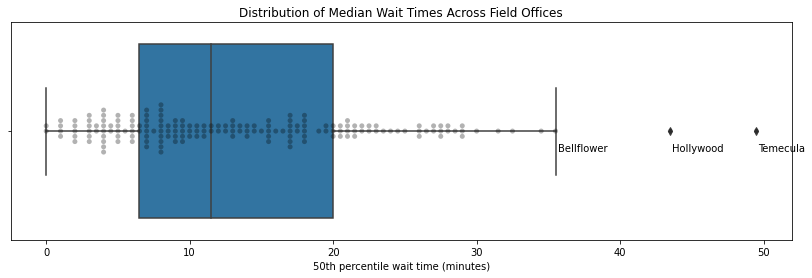

In [12]:
# Daily_wait_50
df_median_wait_time = wait_time_descriptive_stats_df["wkday_wait_50"].to_frame()

fig, ax = plt.subplots(figsize=(14, 4))
sns.boxplot(ax=ax, x="wkday_wait_50", data = df_median_wait_time)
ax = sns.swarmplot(x='wkday_wait_50', data = df_median_wait_time, color = "black", alpha = 0.3)

plt.title("Distribution of Median Wait Times Across Field Offices")
plt.xlabel("50th percentile wait time (minutes)")

# df_mean_wait_time.head(1)
for row in df_median_wait_time.iterrows():
    if row[1][0] > 35: #only label wait times > 25 min
        ax.annotate(row[0], xy=(row[1][0], .1), xytext=(2,2), textcoords='offset points', fontsize=10)
        
plt.savefig('../figs/dmv_median_wait_by_field_office.png')

#### 25th percentile of wait times at each dmv field office

C:\Users\soodoku\AppData\Roaming\Python\Python36\site-packages\seaborn\categorical.py:1282: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\soodoku\AppData\Roaming\Python\Python36\site-packages\seaborn\categorical.py:1286: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


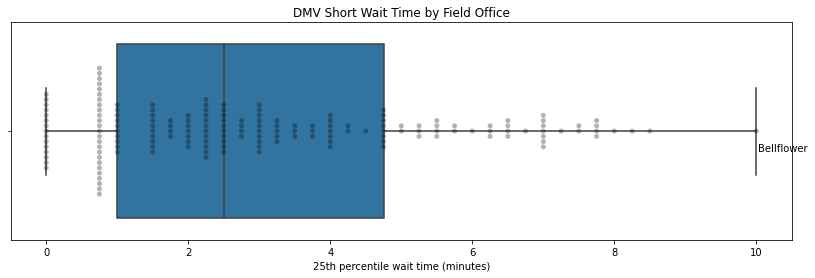

In [13]:
# Daily_wait_25
df_25_wait_time = wait_time_descriptive_stats_df["wkday_wait_25"].to_frame()

fig, ax = plt.subplots(figsize=(14, 4))
sns.boxplot(ax=ax, x="wkday_wait_25",data=df_25_wait_time)
ax = sns.swarmplot(x='wkday_wait_25', data=df_25_wait_time, color="black", alpha=0.3)

plt.title("DMV Short Wait Time by Field Office")
plt.xlabel("25th percentile wait time (minutes)")

# df_mean_wait_time.head(1)
for row in df_25_wait_time.iterrows():
    if row[1][0] > 9: #only label wait times > 9 min
        ax.annotate(row[0], xy=(row[1][0], .1), xytext=(2,2), textcoords='offset points', fontsize=10)
        
plt.savefig('../figs/dmv_25_percentile_wait_by_field_office.png')

#### 75th percentile of wait times at each DMV field office


C:\Users\soodoku\AppData\Roaming\Python\Python36\site-packages\seaborn\categorical.py:1282: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\soodoku\AppData\Roaming\Python\Python36\site-packages\seaborn\categorical.py:1286: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


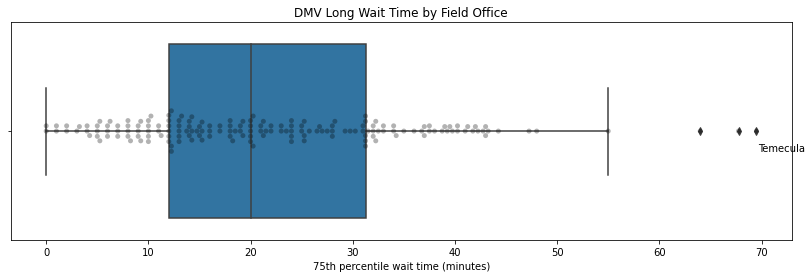

In [14]:
# Daily_wait_75
df_mean_wait_time = wait_time_descriptive_stats_df["wkday_wait_75"].to_frame()

fig, ax = plt.subplots(figsize=(14, 4))
sns.boxplot(ax=ax, x="wkday_wait_75",data=df_mean_wait_time)
ax = sns.swarmplot(x='wkday_wait_75', data=df_mean_wait_time, color="black", alpha=0.3)

plt.title("DMV Long Wait Time by Field Office")
plt.xlabel("75th percentile wait time (minutes)")

# df_mean_wait_time.head(1)
for row in df_mean_wait_time.iterrows():
    if row[1][0] > 68: #only label wait times > 68 min -- labels ovelap is I try to show too many. need to figure out workaround
        ax.annotate(row[0], xy=(row[1][0], .1), xytext=(2,2), textcoords='offset points', fontsize=10)
        
plt.savefig('../figs/dmv_75_percentile_wait_by_field_office.png')

#### Average wait times by weekday hour

In [15]:
wait_time_descriptive_stats_df.columns

Index(['M7', 'M8', 'M9', 'M10', 'M11', 'M12', 'M13', 'M14', 'M15', 'M16',
       'M17', 'M18', 'TU7', 'TU8', 'TU9', 'TU10', 'TU11', 'TU12', 'TU13',
       'TU14', 'TU15', 'TU16', 'TU17', 'TU18', 'W7', 'W8', 'W9', 'W10', 'W11',
       'W12', 'W13', 'W14', 'W15', 'W16', 'W17', 'W18', 'TH7', 'TH8', 'TH9',
       'TH10', 'TH11', 'TH12', 'TH13', 'TH14', 'TH15', 'TH16', 'TH17', 'TH18',
       'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16',
       'F17', 'F18', 'SA7', 'SA8', 'SA9', 'SA10', 'SA11', 'SA12', 'SA13',
       'SA14', 'SA15', 'SA16', 'SA17', 'SA18', 'wait_std', 'wait_25',
       'wait_50', 'wait_75', 'wkday_wait_std', 'wkday_wait_25',
       'wkday_wait_50', 'wkday_wait_75', 'mon_median', 'tue_median',
       'wed_median', 'thu_median', 'fri_median', 'sat_median',
       '7_wkday_hour_median_wait', '8_wkday_hour_median_wait',
       '9_wkday_hour_median_wait', '10_wkday_hour_median_wait',
       '11_wkday_hour_median_wait', '12_wkday_hour_median_wait',
       '13_

In [16]:
weekday_hour_cols = [
    '7_wkday_hour_median_wait', '8_wkday_hour_median_wait',
    '9_wkday_hour_median_wait', '10_wkday_hour_median_wait',
    '11_wkday_hour_median_wait', '12_wkday_hour_median_wait',
    '13_wkday_hour_median_wait', '14_wkday_hour_median_wait',
    '15_wkday_hour_median_wait', '16_wkday_hour_median_wait',
    '17_wkday_hour_median_wait', '18_wkday_hour_median_wait'
]

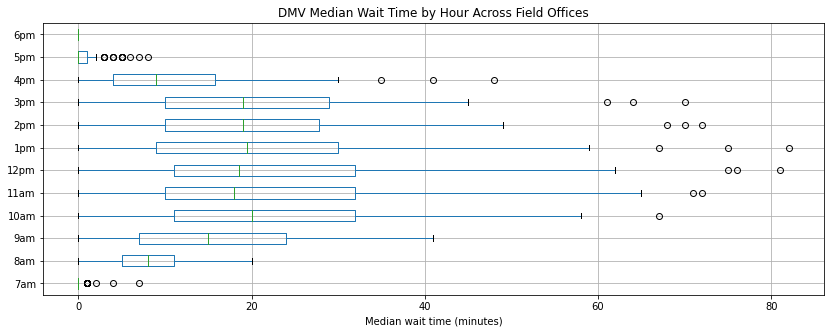

In [17]:
# rename hours columns for visualization
weekday_hours_wait_time_df = wait_time_descriptive_stats_df[weekday_hour_cols]
weekday_hours_wait_time_df = weekday_hours_wait_time_df.rename(columns=
               {'7_wkday_hour_median_wait': '7am', '8_wkday_hour_median_wait': '8am',
                '9_wkday_hour_median_wait': '9am', '10_wkday_hour_median_wait': '10am',
                '11_wkday_hour_median_wait': '11am', '12_wkday_hour_median_wait': '12pm',
                '13_wkday_hour_median_wait': '1pm', '14_wkday_hour_median_wait': '2pm',
                '15_wkday_hour_median_wait': '3pm', '16_wkday_hour_median_wait': '4pm',
                '17_wkday_hour_median_wait': '5pm', '18_wkday_hour_median_wait': '6pm'
                        })
hours_box_plot = weekday_hours_wait_time_df.boxplot(vert=False, figsize=(14,5))
hours_box_plot.set_xlabel("Median wait time (minutes)")
hours_box_plot.set_title("DMV Median Wait Time by Hour Across Field Offices")

hours_box_plot.figure.savefig("../figs/dmv_average_wait_time_by_hour_by_field_office.png")

#### Average wait time by day of the week by field office


In [18]:
wait_time_descriptive_stats_df.columns

Index(['M7', 'M8', 'M9', 'M10', 'M11', 'M12', 'M13', 'M14', 'M15', 'M16',
       'M17', 'M18', 'TU7', 'TU8', 'TU9', 'TU10', 'TU11', 'TU12', 'TU13',
       'TU14', 'TU15', 'TU16', 'TU17', 'TU18', 'W7', 'W8', 'W9', 'W10', 'W11',
       'W12', 'W13', 'W14', 'W15', 'W16', 'W17', 'W18', 'TH7', 'TH8', 'TH9',
       'TH10', 'TH11', 'TH12', 'TH13', 'TH14', 'TH15', 'TH16', 'TH17', 'TH18',
       'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16',
       'F17', 'F18', 'SA7', 'SA8', 'SA9', 'SA10', 'SA11', 'SA12', 'SA13',
       'SA14', 'SA15', 'SA16', 'SA17', 'SA18', 'wait_std', 'wait_25',
       'wait_50', 'wait_75', 'wkday_wait_std', 'wkday_wait_25',
       'wkday_wait_50', 'wkday_wait_75', 'mon_median', 'tue_median',
       'wed_median', 'thu_median', 'fri_median', 'sat_median',
       '7_wkday_hour_median_wait', '8_wkday_hour_median_wait',
       '9_wkday_hour_median_wait', '10_wkday_hour_median_wait',
       '11_wkday_hour_median_wait', '12_wkday_hour_median_wait',
       '13_

In [19]:
weekday_cols = ['mon_median', 'tue_median', 'wed_median', 'thu_median', 'fri_median', 'sat_median']

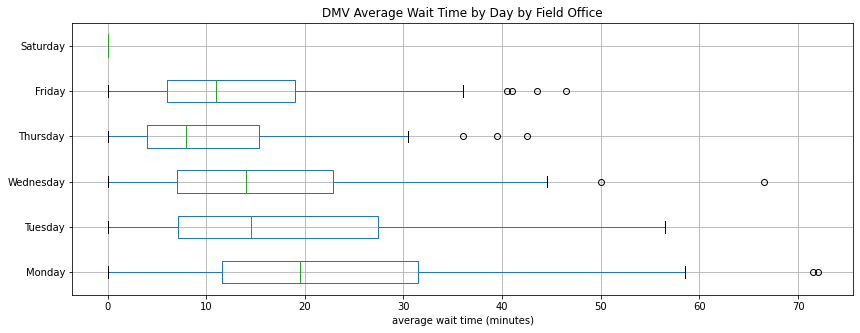

In [20]:
# rename hours columns for visualization
weekday_daily_avg_wait_time_df = wait_time_descriptive_stats_df[weekday_cols]
weekday_daily_avg_wait_time_df = weekday_daily_avg_wait_time_df.rename(columns=
               {'mon_median': 'Monday', 
                'tue_median': 'Tuesday',
                'wed_median': 'Wednesday', 
                'thu_median': 'Thursday',
                'fri_median': 'Friday', 
                'sat_median': 'Saturday'})
hours_box_plot = weekday_daily_avg_wait_time_df.boxplot(vert=False, figsize=(14,5))
hours_box_plot.set_xlabel("average wait time (minutes)")
hours_box_plot.set_title("DMV Average Wait Time by Day by Field Office")

hours_box_plot.figure.savefig("../figs/dmv_average_wait_time_by_day_by_field_office.png")

### Normalize Data by Location

In [21]:
def normalized_df(df):
    (df-df.min())/(df.max()-df.min())

C:\Users\soodoku\AppData\Roaming\Python\Python36\site-packages\seaborn\categorical.py:1282: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\soodoku\AppData\Roaming\Python\Python36\site-packages\seaborn\categorical.py:1286: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


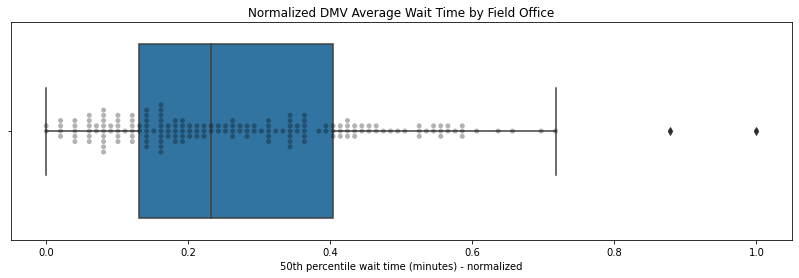

In [22]:
# Normalized daily_wait_50
df_mean_wait_time = wait_time_descriptive_stats_df["wkday_wait_50"]

normalized_df_wait_time = (df_mean_wait_time-df_mean_wait_time.min())/(df_mean_wait_time.max()-df_mean_wait_time.min())
normalized_df_wait_time = normalized_df_wait_time.to_frame()

fig, ax = plt.subplots(figsize=(14, 4))
sns.boxplot(ax=ax, x="wkday_wait_50",data=normalized_df_wait_time)
ax = sns.swarmplot(x='wkday_wait_50', data=normalized_df_wait_time, color="black", alpha=0.3)

plt.title("Normalized DMV Average Wait Time by Field Office")
plt.xlabel("50th percentile wait time (minutes) - normalized")

# df_mean_wait_time.head(1)
for row in normalized_df_wait_time.iterrows():
    if row[1][0] > 35: #only label wait times > 25 min
        ax.annotate(row[0], xy=(row[1][0], .1), xytext=(2,2), textcoords='offset points', fontsize=10)
        
plt.savefig('../figs/normalized_dmv_average_wait_by_field_office.png')

C:\Users\soodoku\AppData\Roaming\Python\Python36\site-packages\seaborn\categorical.py:1282: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\soodoku\AppData\Roaming\Python\Python36\site-packages\seaborn\categorical.py:1286: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


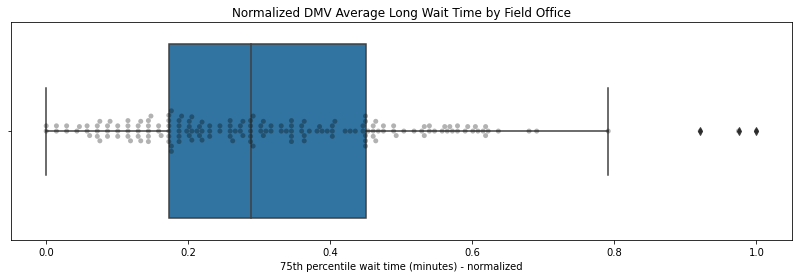

In [23]:
# Normalized daily_wait_75
df_mean_wait_time = wait_time_descriptive_stats_df["wkday_wait_75"]

normalized_df_wait_time = (df_mean_wait_time-df_mean_wait_time.min())/(df_mean_wait_time.max()-df_mean_wait_time.min())
normalized_df_wait_time = normalized_df_wait_time.to_frame()

fig, ax = plt.subplots(figsize=(14, 4))
sns.boxplot(ax=ax, x="wkday_wait_75",data=normalized_df_wait_time)
ax = sns.swarmplot(x='wkday_wait_75', data=normalized_df_wait_time, color="black", alpha=0.3)

plt.title("Normalized DMV Average Long Wait Time by Field Office")
plt.xlabel("75th percentile wait time (minutes) - normalized")

# df_mean_wait_time.head(1)
for row in normalized_df_wait_time.iterrows():
    if row[1][0] > 35: #only label wait times > 25 min
        ax.annotate(row[0], xy=(row[1][0], .1), xytext=(2,2), textcoords='offset points', fontsize=10)

plt.savefig('../figs/normalized_dmv_75_percentile_wait_by_field_office.png')


C:\Users\soodoku\AppData\Roaming\Python\Python36\site-packages\seaborn\categorical.py:1282: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\soodoku\AppData\Roaming\Python\Python36\site-packages\seaborn\categorical.py:1286: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


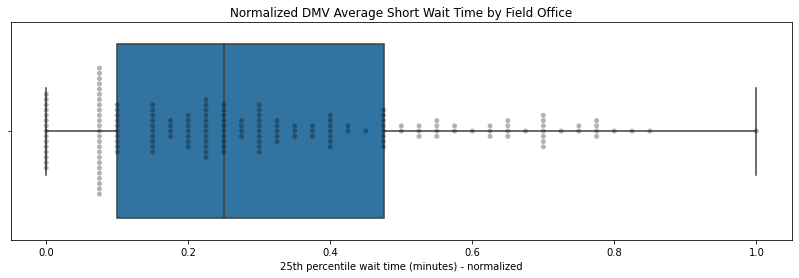

In [24]:
# Normalized daily_wait_25
df_mean_wait_time = wait_time_descriptive_stats_df["wkday_wait_25"]

normalized_df_wait_time = (df_mean_wait_time-df_mean_wait_time.min())/(df_mean_wait_time.max()-df_mean_wait_time.min())
normalized_df_wait_time = normalized_df_wait_time.to_frame()

fig, ax = plt.subplots(figsize=(14, 4))
sns.boxplot(ax=ax, x="wkday_wait_25",data=normalized_df_wait_time)
ax = sns.swarmplot(x='wkday_wait_25', data=normalized_df_wait_time, color="black", alpha=0.3)

plt.title("Normalized DMV Average Short Wait Time by Field Office")
plt.xlabel("25th percentile wait time (minutes) - normalized")

# df_mean_wait_time.head(1)
for row in normalized_df_wait_time.iterrows():
    if row[1][0] > 35: #only label wait times > 25 min
        ax.annotate(row[0], xy=(row[1][0], .1), xytext=(2,2), textcoords='offset points', fontsize=10)

plt.savefig('../figs/normalized_dmv_25_percentile_wait_by_field_office.png')

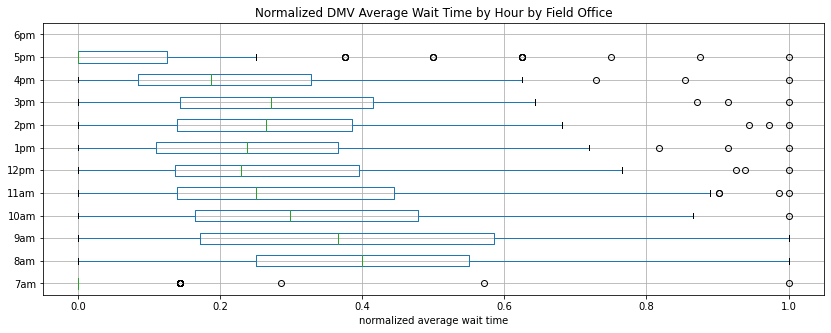

In [25]:
# Normalized Wait Time by Office
weekday_hours_wait_time_df = wait_time_descriptive_stats_df[weekday_hour_cols]
weekday_hours_wait_time_df = weekday_hours_wait_time_df.rename(columns=
               {'7_wkday_hour_median_wait': '7am', '8_wkday_hour_median_wait': '8am',
                '9_wkday_hour_median_wait': '9am', '10_wkday_hour_median_wait': '10am',
                '11_wkday_hour_median_wait': '11am', '12_wkday_hour_median_wait': '12pm',
                '13_wkday_hour_median_wait': '1pm', '14_wkday_hour_median_wait': '2pm',
                '15_wkday_hour_median_wait': '3pm', '16_wkday_hour_median_wait': '4pm',
                '17_wkday_hour_median_wait': '5pm', '18_wkday_hour_median_wait': '6pm'
                        })

normalized_weekday_hours_wait_time_df = (weekday_hours_wait_time_df - weekday_hours_wait_time_df.min())/ (weekday_hours_wait_time_df.max() - weekday_hours_wait_time_df.min())

hours_box_plot = normalized_weekday_hours_wait_time_df.boxplot(vert=False, figsize=(14,5))
hours_box_plot.set_xlabel("normalized average wait time")
hours_box_plot.set_title("Normalized DMV Average Wait Time by Hour by Field Office")

hours_box_plot.figure.savefig("../figs/normalized_dmv_average_wait_time_by_hour_by_field_office.png")

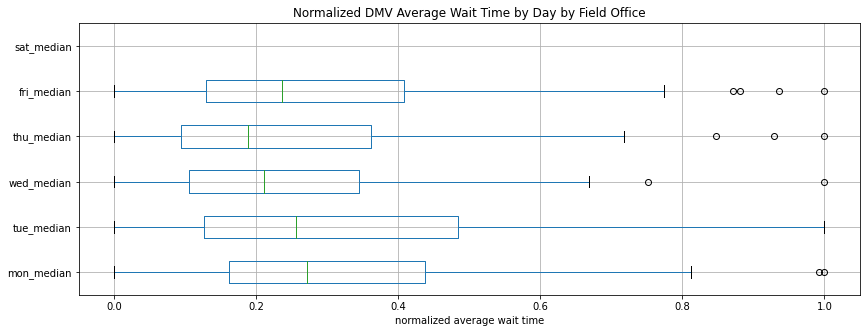

In [26]:
# normalized wait time by office
weekday_daily_avg_wait_time_df = wait_time_descriptive_stats_df[weekday_cols]
weekday_daily_avg_wait_time_df = weekday_daily_avg_wait_time_df.rename(columns=
               {'mon_avg': 'Monday', 'tues_avg': 'Tuesday',
               'wed_avg': 'Wednesday', 'thurs_avg': 'Thursday',
               'fri_avg': 'Friday', 'sat_avg': 'Saturday'})


normalized_weekday_daily_avg_wait_time_df = (weekday_daily_avg_wait_time_df-weekday_daily_avg_wait_time_df.min())/(weekday_daily_avg_wait_time_df.max()-weekday_daily_avg_wait_time_df.min())

hours_box_plot = normalized_weekday_daily_avg_wait_time_df.boxplot(vert=False, figsize=(14,5))
hours_box_plot.set_xlabel("normalized average wait time")
hours_box_plot.set_title("Normalized DMV Average Wait Time by Day by Field Office")


hours_box_plot.figure.savefig("../figs/normalized_dmv_average_wait_time_by_day_by_field_office.png")